# Reading Data

## Connect to store (using sina local file)

First let's create an empty database with you as a single user

In a real application only admin user should have write permission to the file

In [1]:
import os
import sys
import shlex
import random
from subprocess import Popen, PIPE
import kosh

kosh_example_sql_file = "kosh_example_read.sql"

# Create a new store (erase if exists)
store = kosh.connect(kosh_example_sql_file, delete_all_contents=True)

## Adding datasets to the store also known as associating data

The database doesn't actually store any of the data when you associate a file, it just references the file. If the associated file is deleted, the data will no longer be "in" the database. Files are associated to datasets. You can create a dataset for each file or associate multiple files to one dataset. 

The `mime_type` helps determine the correct loader for that specific file format. Loaders available are: 

* `"hdf5"`
* `"npy"`, 
* `"numpy/txt"`, 
* `"pgm"`
* [`"png"` , `"pil"`, `"tif"`, `"tiff"`, `"gif"`, `"image"`]
* `"ultra"`,
* `"json"`,
* `"sidre/path"`
* `pandas.read_*()` methods:
    * [`"pandas/csv"`, `"pandas/excel"`,`"pandas/pickle"`, `"pandas/table"`, `"pandas/fwf"`, `"pandas/clipboard"`, `"pandas/json"`, `"pandas/html"`, `"pandas/xml"`, `"pandas/hdf"`, `"pandas/feather"`,`"pandas/parquet"`, `"pandas/orc"`, `"pandas/sas"`, `"pandas/spss"`, `"pandas/sql_table"`,`"pandas/sql_query"`, `"pandas/sql"`, `"pandas/gbq"`, and `"pandas/stata"`]
    
You can also make your own as seen in Example_Custom_Loader.ipynb.

### hdf5

In [2]:
dataset = store.create()
dataset.associate("../tests/baselines/node_extracts2/node_extracts2.hdf5", mime_type="hdf5", absolute_path=False,
                  metadata= {'paramtest4': 1,
                             'paramtest5': 'test',
                             'paramtest6': 3.14})

'0f4b5c70830843d48e02115538cff0f0'

### csv

You can pass in the `pandas.read_*()` method's arguments into `loader_kwargs`.

In [3]:
dataset.associate("../tests/baselines/csv/my_csv_file.csv",mime_type="pandas/csv", loader_kwargs={'index_col': 0}, absolute_path=False,
                  metadata= {'paramtest4': 1,
                             'paramtest5': 'test_2',
                             'paramtest6': 31.4})

'da1316923a8b45e1ad5319b7102bf3b7'

### ultra

In [4]:
dataset.associate("my_ult_file.ult", mime_type="ultra",
                  metadata= {'paramtest4': 10,
                             'paramtest5': 'test_3',
                             'paramtest6': 314})

'3aea75b1778b48f68c31c12fe90e911e'

We can print our dataset to see which files are associated

In [5]:
print(dataset)

KOSH DATASET
	id: e17faa89b5a244349da85e4f1a69aacd
	name: Unnamed Dataset
	creator: cdoutrix

--- Attributes ---
	creator: cdoutrix
	name: Unnamed Dataset
--- Associated Data (3)---
	Mime_type: hdf5
		../tests/baselines/node_extracts2/node_extracts2.hdf5 ( 0f4b5c70830843d48e02115538cff0f0 )
	Mime_type: pandas/csv
		../tests/baselines/csv/my_csv_file.csv ( da1316923a8b45e1ad5319b7102bf3b7 )
	Mime_type: ultra
		/g/g20/moreno45/Projects/ASCAML/kosh/examples/my_ult_file.ult ( 3aea75b1778b48f68c31c12fe90e911e )
--- Ensembles (0)---
	[]
--- Ensemble Attributes ---
--- Alias Feature Dictionary ---


### sina json
Sina json files are a bit different since they are their own dataset

In [6]:
store.import_dataset("sina_curve_rec.json", match_attributes=['id'])

/g/g19/cdoutrix/git/kosh/kosh/store.py:914: UserWarning: When searching by id use id_pool
  warnings.warn("When searching by id use id_pool")


[KOSH DATASET
	id: obj1
	name: ???
	creator: ???

--- Attributes ---
	param1: 1
	param2: 2
	param3: 3.3
--- Associated Data (2)---
	Mime_type: image/png
		foo.png ( obj1 )
	Mime_type: sina/curve
		internal ( timeplot_1 )
--- Ensembles (0)---
	[]
--- Ensemble Attributes ---
--- Alias Feature Dictionary ---]

## Querying Data

In Kosh data retrievable are called "features".

Let's see which feature are associated with this dataset:

In [7]:
attributes = dataset.list_attributes()
features = dataset.list_features()
print('Attributes:')
print('\t',attributes)
print('\n')
print('Features Sets:')
print('\t',features)

Attributes:
	 ['creator', 'id', 'name']


Features Sets:
	 ['cycles', 'direction', 'elements', 'node', 'node/metrics_0', 'node/metrics_1', 'node/metrics_10', 'node/metrics_11', 'node/metrics_12', 'node/metrics_2', 'node/metrics_3', 'node/metrics_4', 'node/metrics_5', 'node/metrics_6', 'node/metrics_7', 'node/metrics_8', 'node/metrics_9', 'zone', 'zone/metrics_0', 'zone/metrics_1', 'zone/metrics_2', 'zone/metrics_3', 'zone/metrics_4', 'id', 'name', 'creator', 'mynewattribute', 'myotherattribute', 'myparam10', 'myparam20', 'myparam30', 'myparam40', 'myparam50', 'myparam60', 'Gaussian (a: 5.0 w: 5.0 c: 0.0)', 'Gaussian (a: 5.0 w: 5.0 c: 50.0)', 'A + B', 'Straight Line (m: 0.125 b: -2.5 xmin: 60.0 xmax: 40.0)', 'a.y+numpy.random.normal(size=100)', 'E + B', 'Gaussian (a: 10.0 w: 5.0 c: 70.0)', 'g.y+numpy.random.normal(size=500)+70', 'F + H', 'Gaussian (a: 20.0 w: 5.0 c: 20.0)', 'j.y+numpy.random.normal(size=50)+20', 'I + K', 'Gaussian (a: 20.0 w: 1.0 c: 50.0)', 'm.y+numpy.random.normal(size

***Note:*** Once features have been parsed once, they will be cached into the store until another loader is added or the loader used is removed from the stote. To bypass this cache pass `use_cache=False` to `describe_features`

Let's get more information on a specific features

In [8]:
info = dataset.describe_feature("node/metrics_5")
print(info)

{'size': (2, 18), 'format': 'hdf5', 'type': dtype('<f4'), 'dimensions': [{'name': 'cycles', 'first': 11, 'last': 8, 'length': 2}, {'name': 'elements', 'first': 17, 'last': 15, 'length': 18}]}


## Opening Data

We might want to simply acces the URI (to add data to it for example).

for this we will need the *id* of the associated_uri

### hdf5

In [9]:
associated_id = list(dataset.find(mime_type="hdf5", ids_only=True))[0]
h5_file = dataset.open(associated_id)
h5_file

<HDF5 file "node_extracts2.hdf5" (mode r)>

### pandas
Since we are using `pandas.read_*()` methods behind the scenes, the opening of any associated file using `mime_type="pandas/*"` will return a Pandas DataFrame.

In [10]:
associated_csv_pandas = list(dataset.find(mime_type="pandas/csv"))[0]
df = dataset.open(Id=associated_csv_pandas.id)
df

,id,name,creator,mynewattribute,myotherattribute,myparam10,myparam20,myparam30,myparam40,myparam50,myparam60
0,c40699ca067a4e29ba0f25470cf29e57,new_dataset,9b7d60f394284459a1ae979bb0af019f,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21ef0cd592d24c5c8fcc89b066fb7418,15,9b7d60f394284459a1ae979bb0af019f,NaN,NaN,1.279276,0.396805,4.996078,0.950918,1.544344,D
2,f970bd06a67a4956bd475fc48bd5a214,8,9b7d60f394284459a1ae979bb0af019f,NaN,NaN,1.743174,1.052443,4.636964,2.270797,0.109443,U
3,3a79fc992f664a88a08151826f352cdf,new_dataset2,9b7d60f394284459a1ae979bb0af019f,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN
4,6c35fb8c25034483af7031fada507062,16,9b7d60f394284459a1ae979bb0af019f,NaN,NaN,0.144626,1.168135,4.131349,2.466016,1.708542,U
5,b634fce83dfd4e73b1f7f92c43b5ee1d,7,9b7d60f394284459a1ae979bb0af019f,NaN,NaN,1.382974,0.369745,3.904778,0.020335,2.218738,S
6,1c14f05f44d846499b390fd435827f7d,2,9b7d60f394284459a1ae979bb0af019f,NaN,NaN,0.051635,0.106066,0.858589,1.064911,2.274851,[
7,95d16b109ab64c6680af6f0bdc02aa00,9,9b7d60f394284459a1ae979bb0af019f,NaN,NaN,1.391787,0.463967,0.086163,0.108305,1.174103,Z
8,c0215e9c4080430da59979f71009c045,14,9b7d60f394284459a1ae979bb0af019f,NaN,NaN,0.289573,1.109298,1.415927,1.364071,0.631254,Z
9,b1e66c735ac6483d88fe041ab70dab2c,0,9b7d60f394284459a1ae979bb0af019f,NaN,NaN,0.294249,1.180731,2.355948,0.686090,1.978185,U


## Getting Data

Let's access this feature by calling the `get_execution_graph()` function.
This returns a Kosh representation of how to get to a feature's data.
Note that is just a representation (a path) to the data, not the data itself.

### hdf5

In [11]:
feature = dataset.get_execution_graph("node/metrics_5")
feature

This can be shorten as:

In [12]:
feature = dataset["node/metrics_5"]
feature

This gives us a handle to this feature's data, no data has actually been read yet.

Let's retrieve the data by calling the `traverse` function. This will connect the feature's origin (uri) to the data, applying any *transformer* or *operator* to it (see other notebooks to learn about these)

In [13]:
data = feature.traverse()
print(data)

<HDF5 dataset "metrics_5": shape (2, 18), type "<f4">


Which is equivalent to:

In [14]:
data = feature()
print(data)

<HDF5 dataset "metrics_5": shape (2, 18), type "<f4">


This is equivalent of what versions 1.1 and below used to do:

In [15]:
data = dataset.get("node/metrics_5")
print(data)

<HDF5 dataset "metrics_5": shape (2, 18), type "<f4">


Note that you can also slice the feature directly

In [16]:
data = feature[:]
print(data)

<HDF5 dataset "metrics_5": shape (2, 18), type "<f4">


In [17]:
# If you know the dims you can select by value and/or indices
print(dataset.describe_feature("node/metrics_1"))
feature2 = dataset["node/metrics_1"]
data2 = feature2(cycles=slice(0,1), elements=[17, 15])
print(data2.shape)

{'size': (2, 18), 'format': 'hdf5', 'type': dtype('<f4'), 'dimensions': [{'name': 'cycles', 'first': 11, 'last': 8, 'length': 2}, {'name': 'elements', 'first': 17, 'last': 15, 'length': 18}]}
(1, 2)


### pandas

In [18]:
# Single column dataframe
d1 = dataset.get_execution_graph("creator", Id=associated_csv_pandas.id)[:]
d1

,creator
0,9b7d60f394284459a1ae979bb0af019f
1,9b7d60f394284459a1ae979bb0af019f
2,9b7d60f394284459a1ae979bb0af019f
3,9b7d60f394284459a1ae979bb0af019f
4,9b7d60f394284459a1ae979bb0af019f
5,9b7d60f394284459a1ae979bb0af019f
6,9b7d60f394284459a1ae979bb0af019f
7,9b7d60f394284459a1ae979bb0af019f
8,9b7d60f394284459a1ae979bb0af019f
9,9b7d60f394284459a1ae979bb0af019f


In [19]:
dataset.describe_feature("creator")

count                                   25
unique                                   1
top       9b7d60f394284459a1ae979bb0af019f
freq                                    25
Name: creator, dtype: object

You can also update the loader kwargs passed into `pandas.read_*()` methods

In [20]:
associated_csv_pandas.loader_kwargs = {'index_col': None}
df = dataset.open(Id=associated_csv_pandas.id)
df

,Unnamed: 0,id,name,creator,mynewattribute,myotherattribute,myparam10,myparam20,myparam30,myparam40,myparam50,myparam60
0,0,c40699ca067a4e29ba0f25470cf29e57,new_dataset,9b7d60f394284459a1ae979bb0af019f,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,21ef0cd592d24c5c8fcc89b066fb7418,15,9b7d60f394284459a1ae979bb0af019f,NaN,NaN,1.279276,0.396805,4.996078,0.950918,1.544344,D
2,2,f970bd06a67a4956bd475fc48bd5a214,8,9b7d60f394284459a1ae979bb0af019f,NaN,NaN,1.743174,1.052443,4.636964,2.270797,0.109443,U
3,3,3a79fc992f664a88a08151826f352cdf,new_dataset2,9b7d60f394284459a1ae979bb0af019f,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,6c35fb8c25034483af7031fada507062,16,9b7d60f394284459a1ae979bb0af019f,NaN,NaN,0.144626,1.168135,4.131349,2.466016,1.708542,U
5,5,b634fce83dfd4e73b1f7f92c43b5ee1d,7,9b7d60f394284459a1ae979bb0af019f,NaN,NaN,1.382974,0.369745,3.904778,0.020335,2.218738,S
6,6,1c14f05f44d846499b390fd435827f7d,2,9b7d60f394284459a1ae979bb0af019f,NaN,NaN,0.051635,0.106066,0.858589,1.064911,2.274851,[
7,7,95d16b109ab64c6680af6f0bdc02aa00,9,9b7d60f394284459a1ae979bb0af019f,NaN,NaN,1.391787,0.463967,0.086163,0.108305,1.174103,Z
8,8,c0215e9c4080430da59979f71009c045,14,9b7d60f394284459a1ae979bb0af019f,NaN,NaN,0.289573,1.109298,1.415927,1.364071,0.631254,Z
9,9,b1e66c735ac6483d88fe041ab70dab2c,0,9b7d60f394284459a1ae979bb0af019f,NaN,NaN,0.294249,1.180731,2.355948,0.686090,1.978185,U


# Aliases for Features
Datasets from different sources could have different feature names that actually correspond to the same data. The `alias_feature` attribute allows the user to gather the same corresponding data from different datasets.

In [21]:
alias_dict = {'param5': 'node/metrics_5',
              'P6': ['node/metrics_6'],
              'P0': 'metrics_0'}
dataset.alias_feature = alias_dict
# This can also be passed in at the creation of the dataset
# dataset = store.create(metadata={'alias_feature': alias_dict})
print(dataset['param5'][:])
print(dataset['P6'][:])
# print(dataset['P0'][:])  # Cannot uniquely pinpoint P0, could be one of ['node/metrics_0', 'zone/metrics_0']

<HDF5 dataset "metrics_5": shape (2, 18), type "<f4">
<HDF5 dataset "metrics_6": shape (2, 18), type "<f4">


## Associating Multiple Sources

Let's add an image file

In [22]:
dataset.associate("../share/icons/png/Kosh_Logo_K_blue.png", mime_type="png", absolute_path=False)
dataset.list_features()

['cycles',
 'direction',
 'elements',
 'node',
 'node/metrics_0',
 'node/metrics_1',
 'node/metrics_10',
 'node/metrics_11',
 'node/metrics_12',
 'node/metrics_2',
 'node/metrics_3',
 'node/metrics_4',
 'node/metrics_5',
 'node/metrics_6',
 'node/metrics_7',
 'node/metrics_8',
 'node/metrics_9',
 'zone',
 'zone/metrics_0',
 'zone/metrics_1',
 'zone/metrics_2',
 'zone/metrics_3',
 'zone/metrics_4',
 'id',
 'name',
 'creator',
 'mynewattribute',
 'myotherattribute',
 'myparam10',
 'myparam20',
 'myparam30',
 'myparam40',
 'myparam50',
 'myparam60',
 'Gaussian (a: 5.0 w: 5.0 c: 0.0)',
 'Gaussian (a: 5.0 w: 5.0 c: 50.0)',
 'A + B',
 'Straight Line (m: 0.125 b: -2.5 xmin: 60.0 xmax: 40.0)',
 'a.y+numpy.random.normal(size=100)',
 'E + B',
 'Gaussian (a: 10.0 w: 5.0 c: 70.0)',
 'g.y+numpy.random.normal(size=500)+70',
 'F + H',
 'Gaussian (a: 20.0 w: 5.0 c: 20.0)',
 'j.y+numpy.random.normal(size=50)+20',
 'I + K',
 'Gaussian (a: 20.0 w: 1.0 c: 50.0)',
 'm.y+numpy.random.normal(size=500)+50',
 

(403, 431, 4)


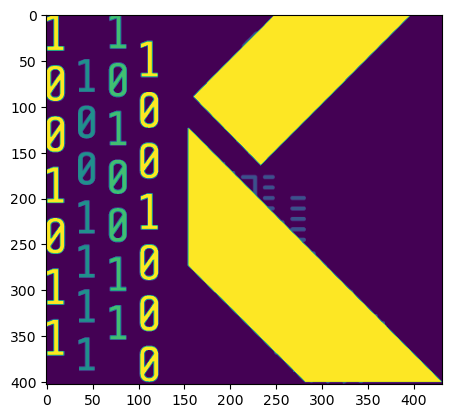

In [23]:
img = dataset["image"]
print(img[:].shape)
try:
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.imshow(img[...,-1])  # Plot last channel
except ImportError:
    print("You will need matplotlib to plot the picture")

We can also retrieve the png as the raw binary data

In [24]:
raw = img(format="bytes")
len(raw), type(raw)

(694772, bytes)

We can associate many image files but this leads to duplicate "image" feature

In [25]:
# let's remove hdf5 for clarity
dataset.dissociate("../tests/baselines/node_extracts2/node_extracts2.hdf5", absolute_path=False)
dataset.list_features()

['id',
 'name',
 'creator',
 'mynewattribute',
 'myotherattribute',
 'myparam10',
 'myparam20',
 'myparam30',
 'myparam40',
 'myparam50',
 'myparam60',
 'Gaussian (a: 5.0 w: 5.0 c: 0.0)',
 'Gaussian (a: 5.0 w: 5.0 c: 50.0)',
 'A + B',
 'Straight Line (m: 0.125 b: -2.5 xmin: 60.0 xmax: 40.0)',
 'a.y+numpy.random.normal(size=100)',
 'E + B',
 'Gaussian (a: 10.0 w: 5.0 c: 70.0)',
 'g.y+numpy.random.normal(size=500)+70',
 'F + H',
 'Gaussian (a: 20.0 w: 5.0 c: 20.0)',
 'j.y+numpy.random.normal(size=50)+20',
 'I + K',
 'Gaussian (a: 20.0 w: 1.0 c: 50.0)',
 'm.y+numpy.random.normal(size=500)+50',
 'L + N',
 'Gaussian (a: 50.0 w: 0.25 c: 10.0)',
 'p.x+numpy.random.normal(size=200)',
 'P + Q',
 'O + R',
 'A + D',
 'image']

Now let's associate a second image file

In [26]:
dataset.associate("../share/icons/png/Kosh_Logo_K_orange.png", mime_type="png", absolute_path=False)
dataset.list_features()  # URI is now added to feature to disambiguate them

['id',
 'name',
 'creator',
 'mynewattribute',
 'myotherattribute',
 'myparam10',
 'myparam20',
 'myparam30',
 'myparam40',
 'myparam50',
 'myparam60',
 'Gaussian (a: 5.0 w: 5.0 c: 0.0)',
 'Gaussian (a: 5.0 w: 5.0 c: 50.0)',
 'A + B',
 'Straight Line (m: 0.125 b: -2.5 xmin: 60.0 xmax: 40.0)',
 'a.y+numpy.random.normal(size=100)',
 'E + B',
 'Gaussian (a: 10.0 w: 5.0 c: 70.0)',
 'g.y+numpy.random.normal(size=500)+70',
 'F + H',
 'Gaussian (a: 20.0 w: 5.0 c: 20.0)',
 'j.y+numpy.random.normal(size=50)+20',
 'I + K',
 'Gaussian (a: 20.0 w: 1.0 c: 50.0)',
 'm.y+numpy.random.normal(size=500)+50',
 'L + N',
 'Gaussian (a: 50.0 w: 0.25 c: 10.0)',
 'p.x+numpy.random.normal(size=200)',
 'P + Q',
 'O + R',
 'A + D',
 'image_@_../share/icons/png/Kosh_Logo_K_blue.png',
 'image_@_../share/icons/png/Kosh_Logo_K_orange.png']

In [27]:
dataset.describe_feature("image_@_../share/icons/png/Kosh_Logo_K_orange.png")

{'size': (427, 403), 'mode': 'RGBA', 'format': 'PNG'}

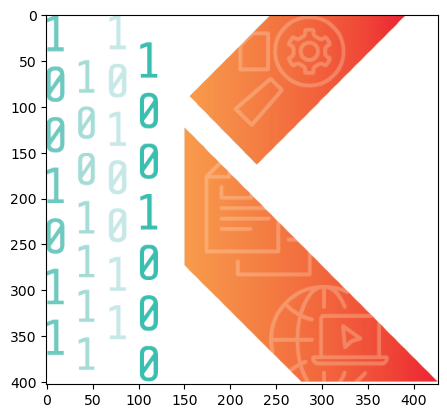

In [28]:
try:
    plt.imshow(dataset.get("image_@_../share/icons/png/Kosh_Logo_K_orange.png"))  # Plot last channel
except Exception:
    print("With matplotlib you would have seen a ")

## Create Pandas Dataframe

### Store Level

You can also create a Pandas DataFrame out of the all the Datasets and their attributes in the Store.

In [29]:
# Adding more attributes
for ds in store.find():
    metadata = {"param1": random.randint(0, 1),
                "param2": random.randint(-10, 10),
                "param3": random.randint(-100, 100),
                "param4": random.randint(-1000, 1000),
                "param5": random.randint(-10000, 10000),
                "param6": random.randint(-100000, 100000),
                }
    ds.update(metadata)
    print(ds.list_attributes())
    
# Create a random dataset for `.find()` method in next cell
store.create(name = 'my_dataset',metadata = {"param1": 0})
df = store.to_dataframe()

print(df)

['alias_feature', 'creator', 'id', 'name', 'param1', 'param2', 'param3', 'param4', 'param5', 'param6']
['id', 'param1', 'param2', 'param3', 'param4', 'param5', 'param6']
                                 id             name  \
0  962118d9641f4c6c9addb579bcb83172       my_dataset   
1                              obj1             <NA>   
2  e17faa89b5a244349da85e4f1a69aacd  Unnamed Dataset   

                            creator  \
0  9b7d60f394284459a1ae979bb0af019f   
1                              <NA>   
2  9b7d60f394284459a1ae979bb0af019f   

                                       alias_feature  param1 param2 param3  \
0                                               <NA>       0   <NA>   <NA>   
1                                               <NA>       0     -2     93   
2  €•I       }”(Œparam5”Œnode/metrics_5”ŒP6”]...       0     10      6   

  param4 param5  param6  
0   <NA>   <NA>    <NA>  
1     -5   6702    4097  
2    388   8433  -54738  


The `store.to_dataframe()` method takes in the same arguments and keyword arguments as the `store.find()` method.

In [30]:
target_data = {'param1': 0}
df = store.to_dataframe(data=target_data)

print(df)

                                 id             name  \
0  962118d9641f4c6c9addb579bcb83172       my_dataset   
1                              obj1             <NA>   
2  e17faa89b5a244349da85e4f1a69aacd  Unnamed Dataset   

                            creator  \
0  9b7d60f394284459a1ae979bb0af019f   
1                              <NA>   
2  9b7d60f394284459a1ae979bb0af019f   

                                       alias_feature  param1 param2 param3  \
0                                               <NA>       0   <NA>   <NA>   
1                                               <NA>       0     -2     93   
2  €•I       }”(Œparam5”Œnode/metrics_5”ŒP6”]...       0     10      6   

  param4 param5  param6  
0   <NA>   <NA>    <NA>  
1     -5   6702    4097  
2    388   8433  -54738  


You can also choose which attributes to add to the dataframe. By default, it will always include `['id', 'name', 'creator']`

In [31]:
target_data = {'param1': 0}
df = store.to_dataframe(data=target_data, data_columns=['param1', 'param6'])

print(df)

                                 id             name  \
0  962118d9641f4c6c9addb579bcb83172       my_dataset   
1                              obj1             <NA>   
2  e17faa89b5a244349da85e4f1a69aacd  Unnamed Dataset   

                            creator  param1  param6  
0  9b7d60f394284459a1ae979bb0af019f       0    <NA>  
1                              <NA>       0    4097  
2  9b7d60f394284459a1ae979bb0af019f       0  -54738  


### Dataset Level

You can also create a Pandas DataFrame out of the all the Associated Files and their attributes in a dataset.

In [32]:
# All Associated Files
df = dataset.to_dataframe()
print('All Associated Files')
print(df,'\n\n')

# Filtered Associated Files
target_data = {'paramtest4': 1}
df = dataset.to_dataframe(data=target_data)
print('Filtered Associated Files')
print(df,'\n\n')

# Specific columns
df = dataset.to_dataframe(data=target_data, data_columns=['paramtest4'])
print('Filtered Associated Files with specific columns')
print(df,'\n\n')

All Associated Files
                                 id   mime_type  \
0  559fc8ec99e746e897e309dc81326243         png   
1  3aea75b1778b48f68c31c12fe90e911e       ultra   
2  da1316923a8b45e1ad5319b7102bf3b7  pandas/csv   
3  2fdbbc8c440642fdbdbe8792603717b7         png   

                                                 uri  \
0          ../share/icons/png/Kosh_Logo_K_orange.png   
1  /g/g20/moreno45/Projects/ASCAML/kosh/examples/...   
2             ../tests/baselines/csv/my_csv_file.csv   
3            ../share/icons/png/Kosh_Logo_K_blue.png   

                           associated  \
0  [e17faa89b5a244349da85e4f1a69aacd]   
1  [e17faa89b5a244349da85e4f1a69aacd]   
2  [e17faa89b5a244349da85e4f1a69aacd]   
3  [e17faa89b5a244349da85e4f1a69aacd]   

                                            fast_sha        loader_kwargs  \
0  dc605b8d43466e787fff42686186a2f31588143d493703...                   {}   
1  448a457f7344ece8c8be9b4ff383ab8258cb3401bc391e...                   {}   
2  6a